In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neural_network
from sklearn import svm
from sklearn import datasets
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import metrics
%matplotlib inline

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/ComputoCienciasUniandes/MetodosComputacionalesDatos/master/homework/2017-10/planetas/lowp_finalresults.csv")
dat= pd.read_csv('https://raw.githubusercontent.com/ComputoCienciasUniandes/MetodosComputacionalesDatos/master/homework/2017-10/planetas/highp_finalresults.csv')

In [4]:
def normalizar(datos):
    scaler = preprocessing.StandardScaler().fit(datos)
    scaler.transform(datos)

In [5]:
#cuenta el numero de planetas
def count_planet(datos):
    planets=datos['ident']
    sistems=np.zeros(2975)
    for i in range(np.size(planets)):
        sistems[planets[i]]=sistems[planets[i]]+1
    return sistems

#Calcula Masa total del sitema
def count_totalMass(datos):
    planets=datos['ident']
    Mass=datos['emepla(i)/emet']
    normalizar(Mass)
    MassSis=np.zeros(2975)
    for i in range(np.size(planets)):
        MassSis[planets[i]]=MassSis[planets[i]]+Mass[i]
#   converter(MassSis)
    return MassSis

#convierte masas terrestreas a masas solares
#def converter(cosas):
#    for i in range(np.size(cosas)):
#        cosas[i]=cosas[i]*0.000003003

#calcula masa del disco
def Mass_Disk(datos):
    planets=datos['ident']
    Mass_Disk=datos['emed']
    normalizar(Mass_Disk)
    Mass_D=np.zeros(2975)
    for i in range(np.size(planets)):
        Mass_D[planets[i]]=float(Mass_Disk[i])
    return Mass_D

#calcula la eficiencia de Masa
def Efi_Mass(datos):
    Disk=Mass_Disk(datos)
    Total=count_totalMass(datos)
    Efi_Mass=np.zeros(2975)
    for i in range(2975):
        Efi_Mass[i]=float(Disk[i]/Total[i])
    return Efi_Mass

def initial_parameters(datos):
    planets=datos['ident']
    init_emestar=datos['emestar']
    init_rc=datos['rc']
    init_qest=datos['qest']
    init_sigma=datos['sigmag_0']
    init_emed=datos['emed']
    init_emetal=datos['emetal']
    init_taugas=datos['taugas']
    initial=np.zeros([2975,7])
    for i in range(np.size(planets)):            
        initial[planets[i],0]=init_emestar[planets[i]]
        initial[planets[i],1]=init_rc[planets[i]]
        initial[planets[i],2]=init_qest[planets[i]]
        initial[planets[i],3]=init_sigma[planets[i]]
        initial[planets[i],4]=init_emed[planets[i]]
        initial[planets[i],5]=init_emetal[planets[i]]
        initial[planets[i],6]=init_taugas[planets[i]]
    normalizar(initial)
    return initial

In [6]:
Num_planetsLow=count_planet(data)
Num_planetsHigh=count_planet(dat)
Mass_SisHigh=count_totalMass(dat)
Mass_SisLow=count_totalMass(data)
Mass_EfiHigh=Efi_Mass(dat)
Mass_EfiLow=Efi_Mass(data)
initialHigh=initial_parameters(dat)
initialLow=initial_parameters(data)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single featur

In [7]:
Xtt=initialHigh[:int(2975*0.8),:]
Xv=initialHigh[int(2975*0.8):,:]
Y1tt=Mass_SisHigh[:int(2975*0.8)]
Y2tt=Mass_EfiHigh[:int(2975*0.8)]
Y3tt=Num_planetsHigh[:int(2975*0.8)]
Y1v=Mass_SisHigh[int(2975*0.8):]
Y2v=Mass_EfiHigh[int(2975*0.8):]
Y3v=Num_planetsHigh[int(2975*0.8):]

In [8]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(Xtt, Y1tt)
X2_train, X2_test, Y2_train, Y2_test = train_test_split(Xtt, Y2tt)
X3_train, X3_test, Y3_train, Y3_test = train_test_split(Xtt, Y3tt)

In [9]:
def FT(predict, test):
    FalsoPositivo=0.
    Acierto=0.
    for i in range(len(predict)):
        if(predict[i]==test[i]):
            Acierto+=1
        elif(test[i]==0 and predict[i]==1):
            FalsoPositivo+=1
    return Acierto/len(predict),FalsoPositivo/len(predict)

In [45]:
def gauss(C,gamma,X_train,X_test,Y_train,Y_test):
    kernel_svc = svm.SVR(C=C, kernel='rbf', gamma=gamma)
    kernel_svc.fit(X_train,Y_train)
    Y_predict = kernel_svc.predict(X_test)
    ac,Fp=FT(Y_predict,Y_test)
    return ac,Fp

In [52]:
def solve_gauss(X_train,X_test,Y_train,Y_test):
    C=np.linspace(0.1,1000,10)
    gamma=np.linspace(0.00001,1000,10)
    n=len(C)*len(gamma)
    gaussx=[]
    gaussy=[]
    maxAC=0
    minFP=1
    Cc=0
    G=0
    for i in range(len(C)):
        for j in range(len(gamma)):
            ac, fp = gauss(C[i],gamma[j],X_train,X_test,Y_train,Y_test)
            if(ac>maxAC):
                maxAC=ac
                Cc=C[i]
                G=gamma[i]
            gaussx.append(ac)
            gaussy.append(fp)
    print (gaussx,gaussy) 

In [53]:
solve_gauss(X1_train, X1_test, Y1_train, Y1_test)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

In [54]:
solve_gauss(X3_train, X3_test, Y3_train, Y3_test)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

In [57]:
def lineal(C,X_train, X_test, Y_train, Y_test):
    linear_svc = svm.SVR(C=C, kernel='linear')
    linear_svc.fit(X_train,Y_train)
    Y_predict = linear_svc.predict(X_test)
    ac,Fp=FT(Y_predict,Y_test)
    return ac,Fp

In [55]:
def solve_linear(X_train, X_test, Y_train, Y_test):
    C=np.linspace(0.0001,1000,100)
    linealx=[]
    linealy=[]
    for i in range(len(C)):
        ac, fp = lineal(C[i],X_train, X_test, Y_train, Y_test)
        linealx.append(ac)
        linealy.append(fp)
    print (linealx,linealy)

In [56]:
solve_linear(X3_train, X3_test, Y3_train, Y3_test)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

In [82]:
def neural_network(X_train, X_test, Y_train, Y_test):
    neural=neural_network.MLPRegressor()
    neural.fit(X_train,Y_train)
    Y_predict=neural.predict(X_test)
    ac,Fp=FT(Y_predict,Y_test)
    return ac,Fp

In [83]:
neural_network(X3_train, X3_test, Y3_train, Y3_test)

AttributeError: 'function' object has no attribute 'MLPRegressor'

In [122]:
neural=neural_network.MLPRegressor(alpha=0.1)

In [123]:
neural.fit(X1_train,Y1_train)

MLPRegressor(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [124]:
Y1_predict=neural.predict(X1_test)

In [125]:
ac,Fp=FT(Y1_predict,Y1_test)

In [126]:
print (ac,Fp)

0.0 0.0


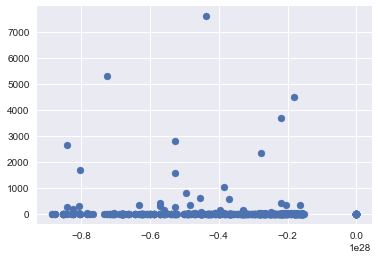

In [127]:
plt.scatter(Y1_predict,Y1_test)

In [208]:
def lasso(X_train, Y_train,X,Y,b):
    clf = linear_model.Lasso(alpha=b)
    clf.fit(X_train, Y_train)
    return (clf.coef_)

In [203]:
def y_prediction(a,X):
    return a[0]*X[:,0]+a[1]*X[:,1]+a[2]*X[:,2]+a[3]*X[:,3]+a[4]*X[:,4]+a[5]*X[:,5]+a[6]*X[:,6]

In [ ]:
alpha=np.linspace(0.000000001,1,100000)
mean=np.zeros(100000)
for i in range(100000):
    a=lasso(X3_train,Y3_train,Xtt,Y3tt,alpha[i])
    Y=y_prediction(a,X3_test)
    mean[i]=metrics.mean_squared_error(Y,Y3_test)

In [ ]:
plt.scatter(alpha,mean)